<a href="https://colab.research.google.com/github/jvataidee/ManualdeAnalisedeDadosPython/blob/master/cap5_variavel_aleatori_dist_probabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**by: [João Ataíde](https://www.joaoataide.com)**
# **CAP 05: Variáveis Aleatórias e Distribuição de Probabilidade**

---



In [2]:
#importar bibliotecas
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats
from scipy.stats import chi2_contingency, spearmanr

## **Variáveis Aleatórias**
As variáveis aleatórias caracteriza-se como a variável que apresenta um valor único para cada elemento, sendo esse determinado aleatoriamente e pom ser diferenciadas das seguintes formas:


* `Variáveis aleatórias discretas: ` são variáveis que aleatoriamente assumem valores enumeráveis, não podendo ser decimal ou inteiro. *EX: quantidade de filhos, funcionários de uma empresa, quantidade de computadores de uma sala de escritório...*

* `Variáveis aleatórias contínua: ` são variável que aleatoriamente assumem diversos valores num intervalo real. *Ex: renda familiar, faturamente de uma empresa, peso, altura ...*

### **Variáveis aleatórias discretas (VAD)**

Sendo $X$ uma VAD essa pode assumir valores $\{x_1,x_2,...,x_n\}$ e suas probabildiades $\{p(x_1),p(x_2),...,p(x_n)\}$, o que gera um função de probabildiade:

$P(x_i) = P(X = x_i) = p_i, \forall\ i=1,..,n $

então,
$p(x_i)\geq 0\ \ \forall\ x_i\ e \sum p(x_i) = 1 $




#### **Esperança VAD**
 valor esperado ou médio dentre os valores de X.

$E(X) = \sum x_i\cdot P(X = x_i)$

#### **Variáncia e Desvio-padrão VAD**

$Var(X) = \sum_{i=1}^n(x_i - E(X))^2\cdot p_i$

$\sigma(X) = \sqrt{Var(X)}$

In [3]:
vendas = [0., 1., 2., 3.]
px = [2/10, 4/10, 3/10, 1/10]

In [4]:
esp = []
for i,j in zip(vendas, px):
    esp.append(i * j)

esp = sum(esp)
esp

1.3

In [5]:
var = []
for i, j in zip(vendas, px):
    var_ = ((i - esp)**2)*j
    var.append(var_)

var = sum(var)
var

0.81

#### **Função de distribuição acumulada (FDA) de um VAD**
É a soma das probabilidades dos valor $x_i \leq x$

$F(x) = P(X \leq x) = \sum p(x_i)$

`Propiedades`<p>
$0 \leq F(x) \leq 1$<p>
$\lim_{x\rightarrow∞}F(x) = 1$<p>
$\lim_{x\rightarrow∞}F(x) = 0$<p>
$a<b → F(a) \leq F(b)$


In [6]:
acumulada = []
for i in range(len(px)):
    if  i <= 0:
        acumulada.append(px[i])
    else:
        acumulada.append(np.round(acumulada[i-1] + px[i],2))
acumulada

[0.2, 0.6, 0.9, 1.0]

In [7]:
def funcao(valor):
    for i in range(len(px)):
        if valor >= vendas[i]:
        #    print(i)
            p_valor = acumulada[i]
            pass
        elif valor < 0:
            p_valor = 0
            
    return p_valor

assert funcao(0.5)== 2/10
assert funcao(1)== 6/10
assert funcao(2.5)== 9/10
assert funcao(3)== 1
assert funcao(4)==1
assert funcao(-0.5)== 0

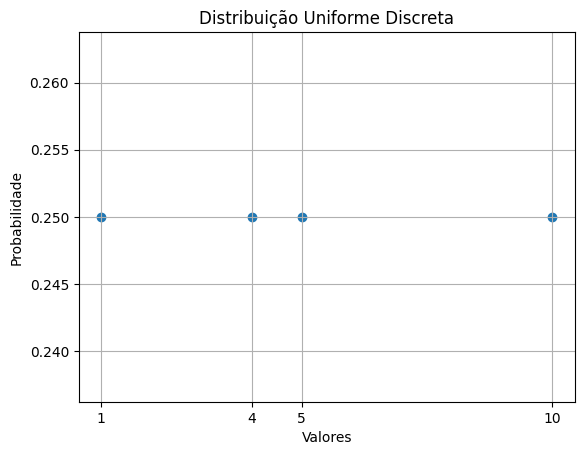

In [15]:
# Definir o intervalo e o tamanho da amostra
inicio_intervalo = 1
fim_intervalo = 10
tamanho_amostra = 4

# Gerar uma amostra de valores com distribuição uniforme discreta
amostra_uniforme_discreta = np.random.randint(inicio_intervalo, fim_intervalo + 1, tamanho_amostra)

# Contar a ocorrência de cada valor na amostra
valores, contagem = np.unique(amostra_uniforme_discreta, return_counts=True)

# Calcular as probabilidades de cada valor
probabilidades = contagem / tamanho_amostra

# Criar o gráfico de barras da distribuição uniforme discreta
plt.scatter(valores, probabilidades)
plt.xlabel('Valores')
plt.ylabel('Probabilidade')
plt.title('Distribuição Uniforme Discreta')
plt.xticks(valores)
plt.grid(True)

# Exibir o gráfico
plt.show()

### **Variáveis aleatórias contínuas (VAC)**
Sendo $X$ uma variável contínua assosiada a uma função de densidade de probabilidade $f(x)$.<p>
$\int_{-∞}^{+∞}f(x)dx = 1, f(x)\geq 0$<p>
$\forall a e b tal que -∞ < a < b < +∞$<p>
$P(a\leq X\leq b) = \int_{-∞}^{+∞}f(x)dx $

#### **Esperança VAC**
Esperança matemática 

$E(X)= \int_{-∞}^{+∞}x\cdot f(x)dx$

#### **Variáncia e Desvio-padrão VAC**

$Var(X) = \int_{-∞}^{+∞}(x - E(x))^2\cdot f(x)dx$

#### **Função de distribuição acumulada (FDA) de um VAC**

$F(x) = P(X \leq x), -∞ < x < +∞$ <p>
`Propiedades`<p>

$0 \leq F(x) \leq 1$<p>
$\lim_{x\rightarrow∞}F(x) = 1$<p>
$\lim_{x\rightarrow∞}F(x) = 0$<p>
$a<b → F(a) \leq F(b)$


### **Distribuição de Probabiidade Para Variáveis Aleatórias Discretas**

$P(X =X_i) = p(x_i) = \frac{1}{n}, i = 1, 2, ... n$

In [8]:
X = [1., 2., 3., 4., 5., 6.]
fx = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

#### **Esperança matemática**

$E(X) = \frac{1}{n}\sum_{i= 1}^nx_i$

In [9]:
ex = (sum(X))*(1/len(X))
ex

3.5

#### **Variância de X**

$Var(X)=\frac{1}{n}[\sum_{i=1}^nx_i^2-\frac{(\sum_{i= 1}^nx_i)^2}{n}]$

In [10]:
x2 = []
for i in X: x2.append(i**2)
x2

[1.0, 4.0, 9.0, 16.0, 25.0, 36.0]

In [11]:
var = (1/len(X))*(sum(x2)-((sum(X)**2)/len(X)))
var

2.9166666666666665

#### **Função de distribuição acumulada (FDA)**

$F(X)=P(X\leq x)=\sum_{x_i\leq x}\frac{1}{n}=\frac{n(x)}{n}$


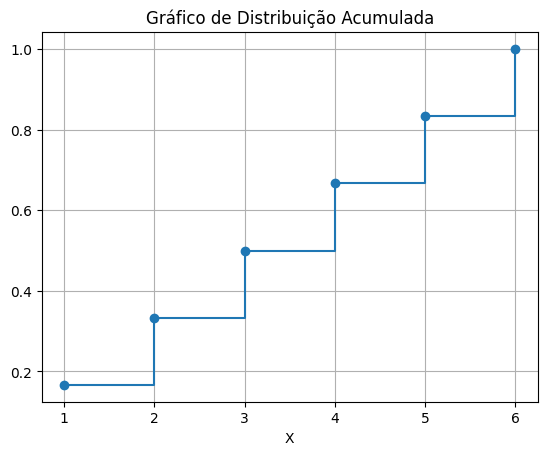

In [25]:
# Valores de X e suas probabilidades
valores_x = [1, 2, 3, 4, 5, 6, 7]
probabilidades = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# Calcular a porcentagem acumulada
porcentagem_acumulada = np.cumsum(probabilidades)

# Criar o gráfico de distribuição acumulada
plt.plot(valores_x[:-1], porcentagem_acumulada, 'o-', drawstyle='steps-post')
plt.xlabel('X')
plt.title('Gráfico de Distribuição Acumulada')
plt.grid(True)

# Exibir o gráfico
plt.show()


#### **Distribuição de Bernoulli**

$F(x) = P(X\leq x) = \Bigg\{{0 \quad x<0},\quad{1-p \quad 0 \leq x <1},\quad{1 \quad x\geq1}
$

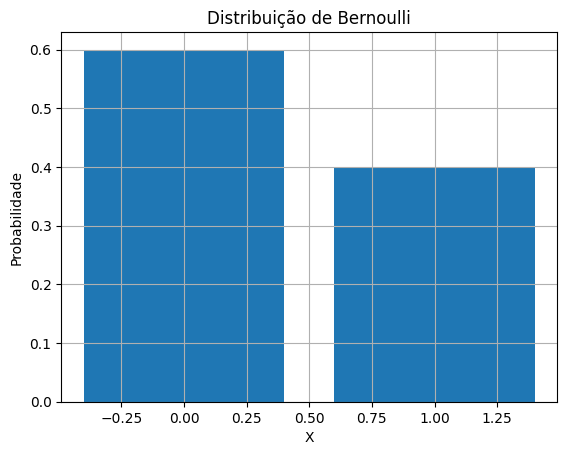

In [64]:
from scipy.stats import bernoulli

# Probabilidade de sucesso (ocorrência do evento)
p = 0.4

# Valores de X (sucesso ou falha)
valores_x = [0, 1]

# Calcular a probabilidade para cada valor de X
probabilidade = bernoulli.pmf(valores_x, p)

# Criar o gráfico da distribuição de Bernoulli
plt.bar(valores_x, probabilidade)
plt.xlabel('X')
plt.ylabel('Probabilidade')
plt.title('Distribuição de Bernoulli')
plt.grid(True)

# Exibir o gráfico
plt.show()

#### **Distribuição Binomial**

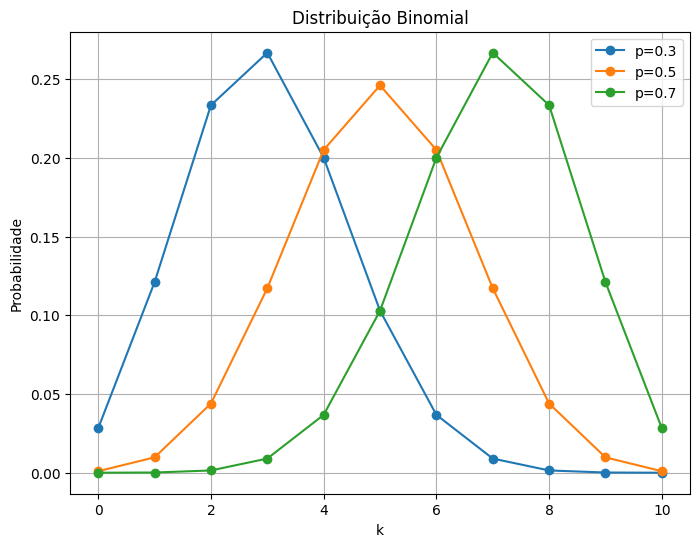

In [50]:
from scipy.stats import binom

# Parâmetros da distribuição binomial
n = 10
p_values = [0.3, 0.5, 0.7]

# Valores de k (sucessos)
k = np.arange(0, n+1)

# Criar o gráfico
plt.figure(figsize=(8, 6))

# Plotar a distribuição binomial para cada função de probabilidade
for p in p_values:
    # Calcular a probabilidade para cada valor de k
    probabilidade = binom.pmf(k, n, p)
    
    # Plotar a distribuição binomial
    plt.plot(k, probabilidade, 'o-', label=f'p={p}')

# Definir rótulos dos eixos, título e legenda
plt.xlabel('k')
plt.ylabel('Probabilidade')
plt.title('Distribuição Binomial')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()

#### **Distribuição geométrica**

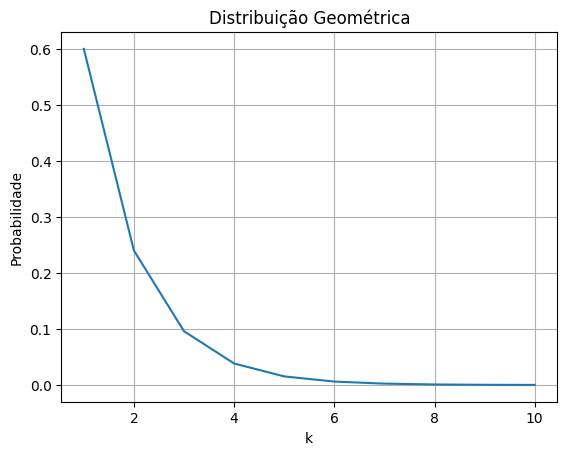

In [56]:
from scipy.stats import geom

# Parâmetro da distribuição geométrica
p = 0.6

# Valores de k (número de tentativas até o primeiro sucesso)
k = np.arange(1, 11)

# Calcular a probabilidade para cada valor de k
probabilidade = geom.pmf(k, p)

# Criar o gráfico da distribuição geométrica
plt.plot(k, probabilidade)
plt.xlabel('k')
plt.ylabel('Probabilidade')
plt.title('Distribuição Geométrica')
plt.grid(True)

# Exibir o gráfico
plt.show()

#### **Distribuição binomial negativa** (Binomial de Pascal)

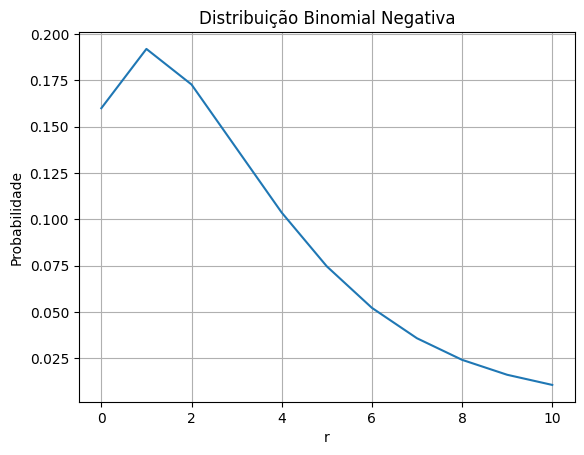

In [58]:
from scipy.stats import nbinom

# Parâmetros da distribuição binomial negativa
k = 2
p = 0.4

# Valores de r (número de falhas antes de obter k sucessos)
r = np.arange(0, 11)

# Calcular a probabilidade para cada valor de r
probabilidade = nbinom.pmf(r, k, p)

# Criar o gráfico da distribuição binomial negativa
plt.plot(r, probabilidade)
plt.xlabel('r')
plt.ylabel('Probabilidade')
plt.title('Distribuição Binomial Negativa')
plt.grid(True)

# Exibir o gráfico
plt.show()

#### **Distribuição Hipergeométricaa** 

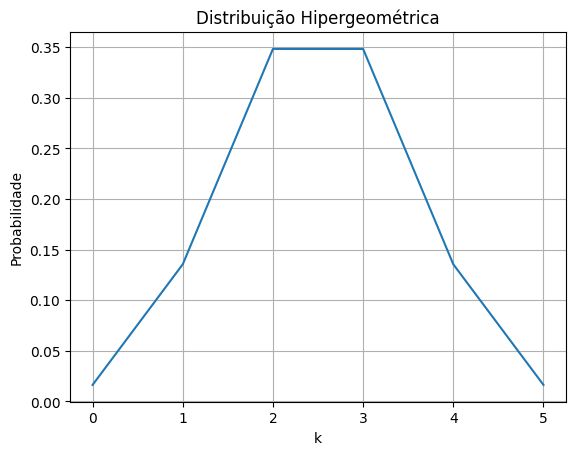

In [66]:
from scipy.stats import hypergeom

# Parâmetros da distribuição hipergeométrica
N = 20  # Tamanho da população
K = 10  # Número de elementos de interesse na população
n = 5   # Tamanho da amostra

# Valores de k (número de elementos de interesse na amostra)
k = np.arange(0, n+1)

# Calcular a probabilidade para cada valor de k
probabilidade = hypergeom.pmf(k, N, K, n)

# Criar o gráfico da distribuição hipergeométrica
plt.plot(k, probabilidade)
plt.xlabel('k')
plt.ylabel('Probabilidade')
plt.title('Distribuição Hipergeométrica')
plt.grid(True)

# Exibir o gráfico
plt.show()

#### **Distribuição Poisson** 

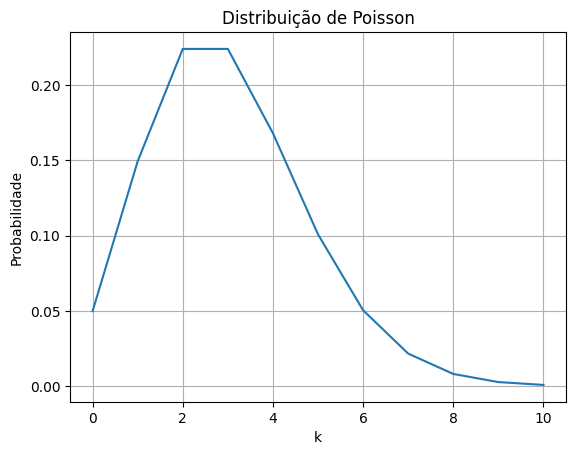

In [68]:
from scipy.stats import poisson

# Parâmetro lambda da distribuição de Poisson
lmbda = 3

# Valores de k (número de ocorrências)
k = np.arange(0, 11)

# Calcular a probabilidade para cada valor de k
probabilidade = poisson.pmf(k, lmbda)

# Criar o gráfico da distribuição de Poisson
plt.plot(k, probabilidade)
plt.xlabel('k')
plt.ylabel('Probabilidade')
plt.title('Distribuição de Poisson')
plt.grid(True)

# Exibir o gráfico
plt.show()

### **Distribuição de Probabiidade Para Variáveis Aleatórias Contínua**

#### **Distribuição Uniforme** 

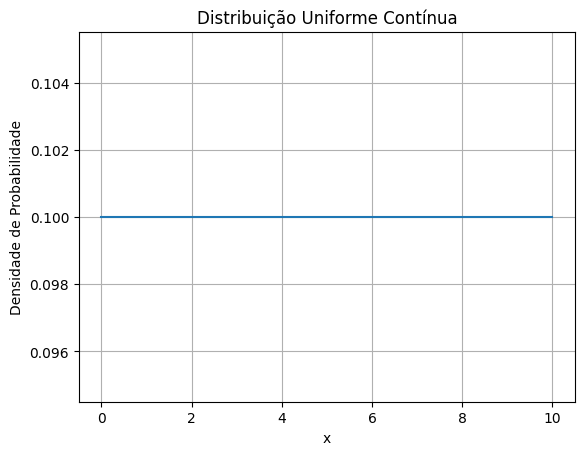

In [69]:
from scipy.stats import uniform

# Parâmetros da distribuição uniforme contínua
a = 0   # Limite inferior
b = 10  # Limite superior

# Valores de x
x = np.linspace(a, b, 100)

# Calcular a densidade de probabilidade para cada valor de x
pdf = uniform.pdf(x, a, b - a)

# Criar o gráfico da distribuição uniforme contínua
plt.plot(x, pdf)
plt.xlabel('x')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição Uniforme Contínua')
plt.grid(True)

# Exibir o gráfico
plt.show()

#### **Distribuição Normal** 

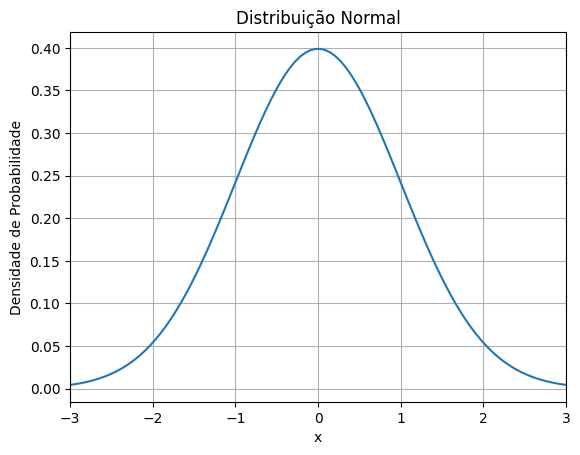

In [71]:
from scipy.stats import norm

# Parâmetros da distribuição normal
mu = 0   # Média
sigma = 1  # Desvio padrão

# Valores de x
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Calcular a densidade de probabilidade para cada valor de x
pdf = norm.pdf(x, mu, sigma)

# Criar o gráfico da distribuição normal
plt.plot(x, pdf)
plt.xlabel('x')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição Normal')
plt.grid(True)

# Definir limites para o eixo x
plt.xlim(mu - 3*sigma, mu + 3*sigma)

# Exibir o gráfico
plt.show()

#### **Distribuição Exponecial** 

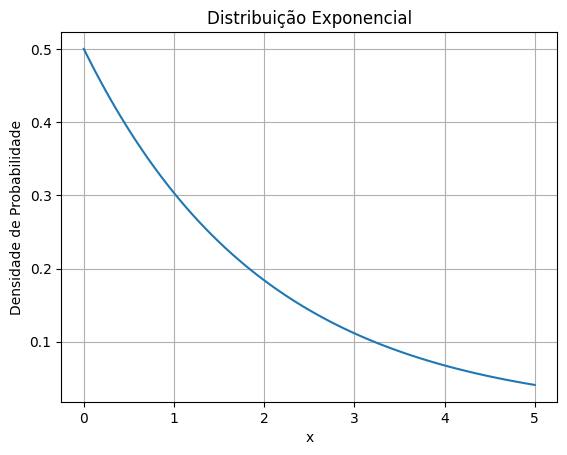

In [72]:
from scipy.stats import expon

# Parâmetro lambda da distribuição exponencial
lmbda = 0.5

# Valores de x
x = np.linspace(0, 5, 100)

# Calcular a densidade de probabilidade para cada valor de x
pdf = expon.pdf(x, scale=1/lmbda)

# Criar o gráfico da distribuição exponencial
plt.plot(x, pdf)
plt.xlabel('x')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição Exponencial')
plt.grid(True)

# Exibir o gráfico

#### **Distribuição Gama** 

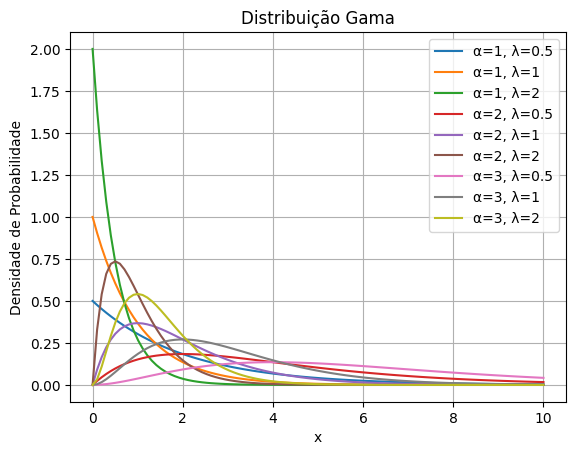

In [74]:
from scipy.stats import gamma

# Parâmetros da distribuição gama
alpha_values = [1, 2, 3]  # Valores de alfa
lambda_values = [0.5, 1, 2]  # Valores de lambda

# Valores de x
x = np.linspace(0, 10, 100)

# Criar o gráfico da distribuição gama para cada combinação de alfa e lambda
for alpha in alpha_values:
    for lmbda in lambda_values:
        # Calcular a densidade de probabilidade para cada valor de x
        pdf = gamma.pdf(x, alpha, scale=1/lmbda)
        
        # Plotar a distribuição gama
        label = f'α={alpha}, λ={lmbda}'
        plt.plot(x, pdf, label=label)

# Definir rótulos dos eixos, título do gráfico e legenda
plt.xlabel('x')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição Gama')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()

#### **Distribuição Relação Poisson e Gama - Qui-quadrado** 

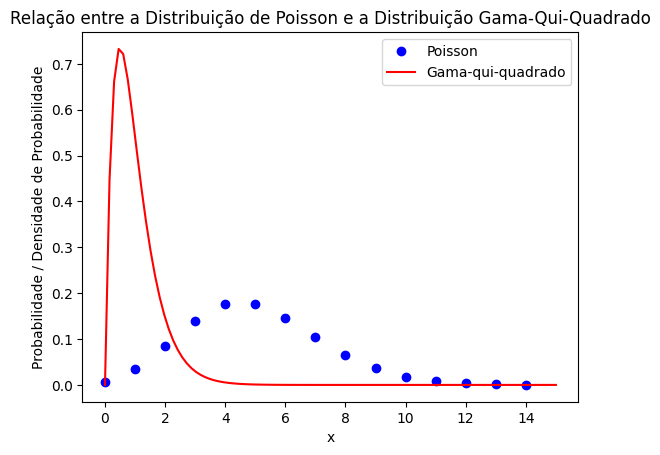

In [75]:
from scipy.stats import poisson, gamma, chi2

# Parâmetros da distribuição de Poisson
lambda_poisson = 5

# Parâmetros da distribuição gama
alpha_gamma = 2
beta_gamma = 2

# Valores de x
x_poisson = np.arange(0, 15)
x_gamma = np.linspace(0, 15, 100)

# Calcular a probabilidade para cada valor de x (distribuição de Poisson)
pmf_poisson = poisson.pmf(x_poisson, lambda_poisson)

# Calcular a densidade de probabilidade para cada valor de x (distribuição gama)
pdf_gamma = gamma.pdf(x_gamma, alpha_gamma, scale=1/beta_gamma)

# Criar o gráfico
fig, ax = plt.subplots()

# Plotar a distribuição de Poisson
ax.plot(x_poisson, pmf_poisson, 'bo', label='Poisson')

# Plotar a distribuição gama-qui-quadrado
ax.plot(x_gamma, pdf_gamma, 'r-', label='Gama-qui-quadrado')

# Definir rótulos dos eixos, título do gráfico e legenda
ax.set_xlabel('x')
ax.set_ylabel('Probabilidade / Densidade de Probabilidade')
ax.set_title('Relação entre a Distribuição de Poisson e a Distribuição Gama-Qui-Quadrado')
ax.legend()

# Exibir o gráfico
plt.show()

#### **Distribuição t-student** 

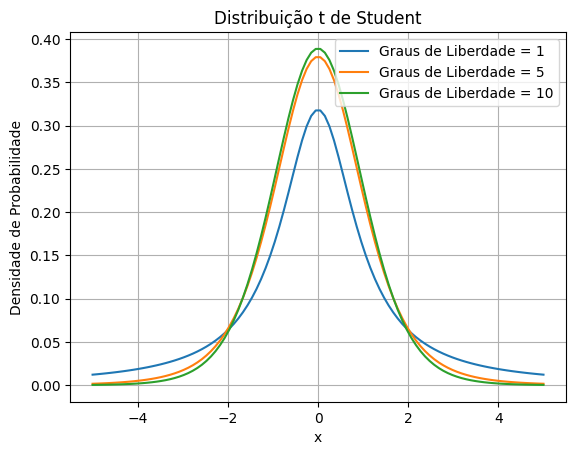

In [76]:
from scipy.stats import t

# Graus de liberdade da distribuição t
df_values = [1, 5, 10]

# Valores de x
x = np.linspace(-5, 5, 100)

# Criar o gráfico da distribuição t para cada valor de graus de liberdade
for df in df_values:
    # Calcular a densidade de probabilidade para cada valor de x
    pdf = t.pdf(x, df)
    
    # Plotar a distribuição t
    label = f'Graus de Liberdade = {df}'
    plt.plot(x, pdf, label=label)

# Definir rótulos dos eixos, título do gráfico e legenda
plt.xlabel('x')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição t de Student')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()

#### **Distribuição F Snedecor** 

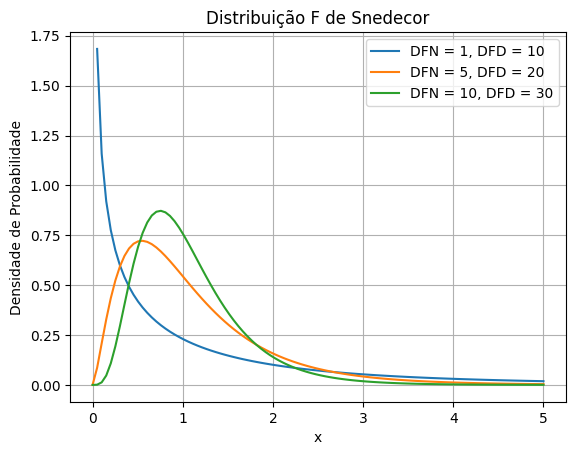

In [77]:
from scipy.stats import f

# Graus de liberdade da distribuição F de Snedecor
dfn_values = [1, 5, 10]
dfd_values = [10, 20, 30]

# Valores de x
x = np.linspace(0, 5, 100)

# Criar o gráfico da distribuição F de Snedecor para cada combinação de graus de liberdade
for dfn, dfd in zip(dfn_values, dfd_values):
    # Calcular a densidade de probabilidade para cada valor de x
    pdf = f.pdf(x, dfn, dfd)
    
    # Plotar a distribuição F de Snedecor
    label = f'DFN = {dfn}, DFD = {dfd}'
    plt.plot(x, pdf, label=label)

# Definir rótulos dos eixos, título do gráfico e legenda
plt.xlabel('x')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição F de Snedecor')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()